# Lab1: Gradient descent principles

**Carla Sendra Balcells**\
**Roxane Le Tensorer**\
**Rachel Trimble**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

We first create a function called "creation". This function will be used in the entire lab, only changing the parameters which are : <br>
- function : can be a convex function, a more complex function or the rosenbrock function.<br>
- method : can be the gradient descent method, the gradient descent method with stopping criterion, or the newton method.<br>
- alpha : the $\alpha$ we use in the algorithm.<br>
- iters : max number if iterations of the system. In general, this is 100. 

In [2]:
def creation(function, method, alpha,iters):
    fig = plt.figure(figsize=(20,5))

    num_plots = 3
    base = 100 + num_plots * 10

    for i in range(num_plots):
        ax = fig.add_subplot(base+(1+i))

        X = np.arange(-3, 3, 0.05)
        Y = np.arange(-3, 3, 0.05)
        X, Y = np.meshgrid(X, Y)
        
        
        Z = function([X,Y])[0];
        ax.contour(X, Y, Z, 50)
        
        function_grad = function([X,Y])[1]

        gradx = function_grad[0];
        grady = function_grad[1];
        ax.streamplot(X, Y, gradx, grady)

        x_lim = 3.5
        x = x_lim*np.random.random(2) - x_lim/2
        ax = method(x, ax, alpha, iters, function)

    plt.show()

### 1. Gradient descent method
#### 1.1. A simple quadratic function

$f(x)=x_1^2+x_2^2$ where $\nabla f(x)=(2x_1, 2x_2)$ is the gradient.

We create our convex function. It returns an array with 2 elements : 
- the function itself<br>
- an array representing its gradient<br>

In [3]:
def convex1(x):
    return [x[0]**2+x[1]**2,[2*x[0], 2*x[1]]]

We then define a function which does the gradient descent:

$x^{k+1}=x^k-\alpha^k\nabla f(x^k)$ where k is the iteration

In [4]:
def grad_desc(x0, fig, alpha, iters, function):
    
    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    for k in range(iters):
        grad = function(x0)[1]
        x0 = x0 - alpha * np.array(grad)
        
        fig.plot(*x0, 'r.')
         
    print("solution : %.20f, %.20f"%(x0[0],x0[1]))
    fig.plot(*x0, 'b+')
    return fig

Then, we call the creation function, with the corresponding parameters.

solution : 0.00000000026943384777, 0.00000000029707620283
solution : 0.00000000032504313222, 0.00000000032828727040
solution : -0.00000000005700751334, -0.00000000018365532386


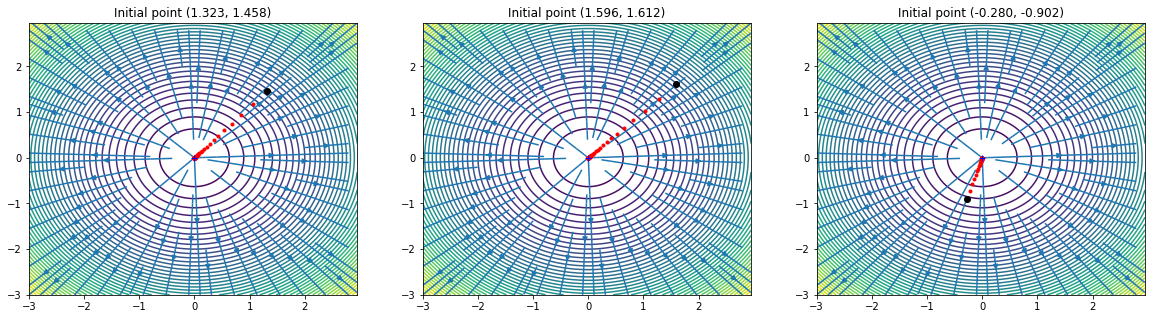

In [5]:
creation(convex1, grad_desc, 0.1, 100)

We test the algorithm setting $\alpha$ = 0.1, and plot the contour graph of the function with the path the gradient descent follows. The initial point is represented with a black dot, each step is represented with a red dot, and the minimum is represented with a blue cross.

We tested the algorithm with three different $x_0$ starting points generated randomly to demonstrate that no matter what the starting point is we always converge to the minimum. 

It is clear from the result that the only minimum this function has is zero (and this makes sense since it is a convex function with just one minima) with all of the three random $x_0$ merging to zero.  

We then tested the same algorithm but with 1,000 iterations instead of 100. This resulted in a solution closer to zero compared to the one achieved above for 100 indicating that the more iterations that are tested the closer the solution arrives to the minimum.

solution : -0.00000000000000000000, 0.00000000000000000000
solution : 0.00000000000000000000, 0.00000000000000000000
solution : -0.00000000000000000000, -0.00000000000000000000


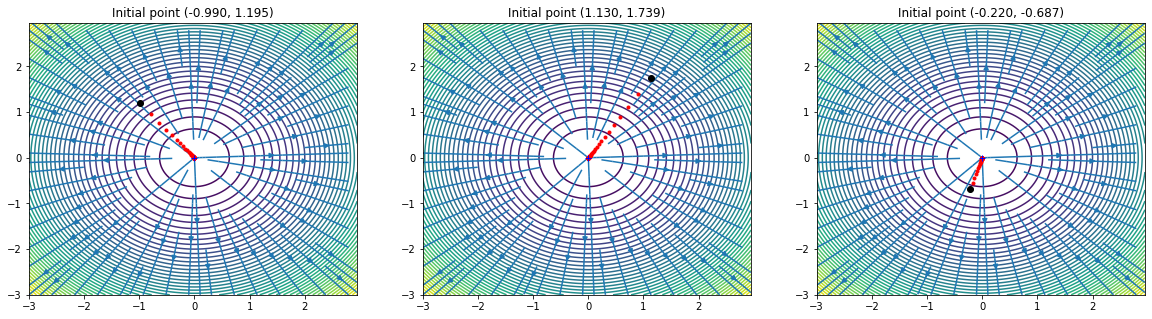

In [6]:
creation(convex1, grad_desc, 0.1, 1000)

However it should be noted that the difference is not significant and hence it is not necessary to perform 1,000 iterations. In fact if we add a precision of 0.0001 we get convergence after just 25 steps. 

Next we test adjusting the value of $\alpha=1$. We should see some difference now, since this parameter defines the magnitude of the step used for the gradient descent method. If the value is bigger it might seem that the convergence will be faster but we check that this is not the case.

solution : 0.32698735910701159924, -0.60866783572160443327
solution : -0.55068798155109766057, 0.71145831428335304381
solution : -0.28775347671676132499, 0.07469446486214681435


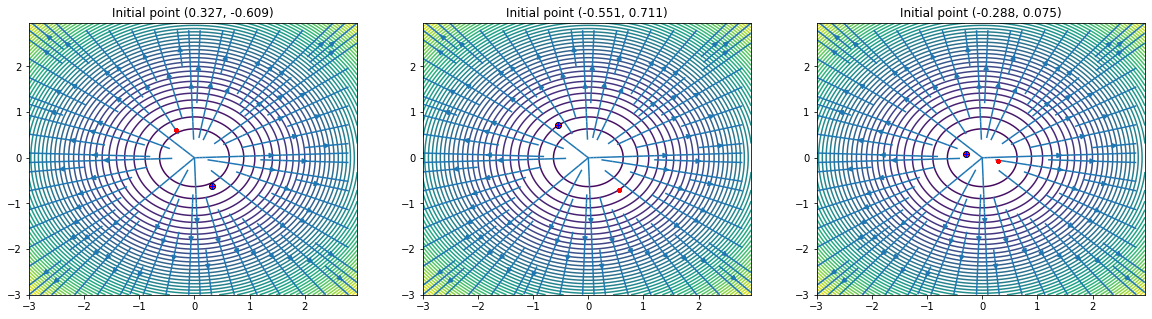

In [7]:
creation(convex1, grad_desc, 1, 100)

This time, we do not get convergence. This situation is very interesing, because the inverse of any gradient vectors in this case can be represented with a line whose middle is precisely the minimum of the function. That's the reason why, by having $\alpha$ = 1, the x is only going from one extremity of this line to the other, without having the possibility to reach the middle.<br>

We can now try with a value really close to 1, with a value of 0.95

solution : -0.00002928542402563573, -0.00002305814649321954
solution : 0.00004112541528385831, 0.00001231533971419288
solution : -0.00002174256710266521, 0.00000411537157190869


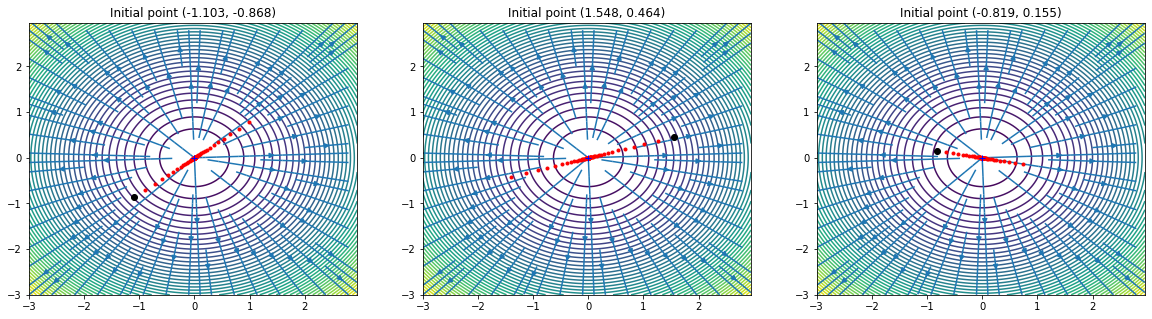

In [8]:
creation(convex1, grad_desc, 0.95, 100)

In this case, we can see that the algorithm achieves the goal of converging to the minimum, but this is not efficient since it always exceeds the solution and has to go back and forth, each time getting a little bit closer, until reaching the minimum.<br>
Finally, we can try the algorithm with $\alpha$ = 2 :

solution : 591567004224.16735839843750000000, -839211360583.99475097656250000000
solution : 908327815880.91540527343750000000, 581851598204.36230468750000000000
solution : 1177827852809.93945312500000000000, -272457896066.14245605468750000000


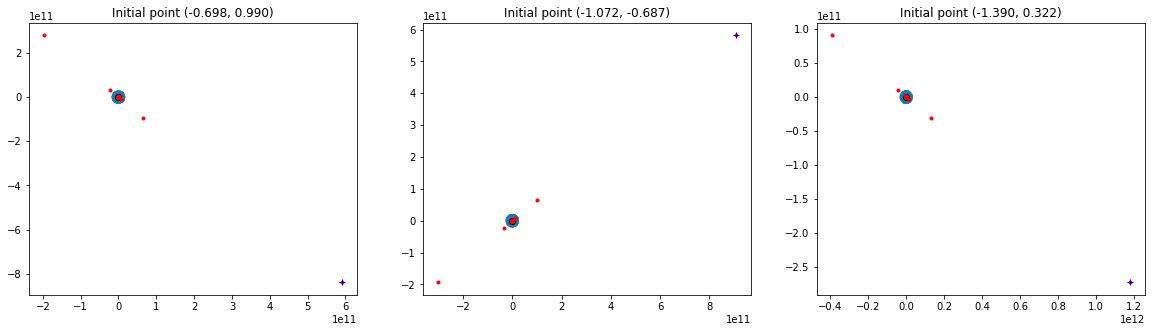

In [9]:
creation(convex1, grad_desc, 2, 25)

As we could expect, with $\alpha$ > 1, it as totally impossible for the algorithm to converge to the minimum, because it is always moving away from it. This is the reason why the result we obtain at the end has no sense. <br>
We can see then that it is necessary to have : 0 < $\alpha$ < 1. 

#### 1.2. A more complex function

$f(x_1,x_2)= x_1^2(4 - 2.1x_1^2 + \frac{1}{3}x_1^4) + x_1x_2 + x_2^2(-4+4x_2^2)$\
where  $\nabla f(x)=(2x_1^5-8.4x_1^3+8x_1+x_2, x_1+16x_2^3-8x_2)$ 

We are now working on a more complex function. As for the precedent one, we create the corresponding function. But this time, it returns an array with three elements : 
- the function itself
- an array representing the gradient 
- an array representing the hessian matrix
    
It is absolutely not possible to guess which minima of this function are going to be found, as the minima will depend on the starting point. So in this case we might have several local minimum. 

In [10]:
def function_x(x):
    X=x[0]
    Y=x[1]
    func = (X**2)*(4-(2.1*(X**2))+(1/3)*(X**4))+X*Y+(Y**2)*(-4+4*(Y**2))
    
    gradx = 2*X**5 - 8.4*X**3 + 8*X + Y
    grady = X + 16*Y**3 - 8*Y
    grad = [gradx, grady]
    
    hess11 = 10*X**4-25.2*X**2+8
    hess12 = 1
    hess22 = 48*Y**2-8
    hess21 = 1
    hess = [[hess11,hess12],[hess21,hess22]]
    
    return[func, grad, hess]

We begin with the simple algorithm explained before, with only 100 iterations. Since here it is harder to get the minima we will use a very small $\alpha$ value. If not, depending on the initial point the algorithm can't converge inside the gradient descent map. 

solution : 0.08984252884095927927, -0.71265646232881607602
solution : 0.08984204747869359298, -0.71265640697411813953
solution : -1.60710466269364404823, -0.56865167561134921659


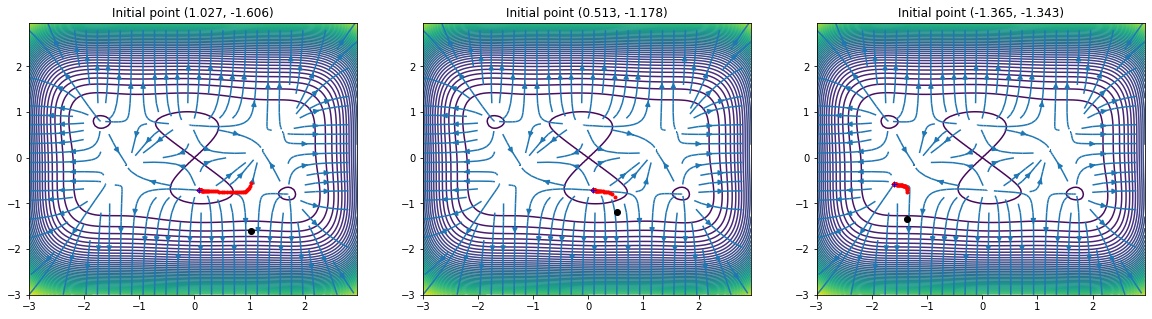

In [24]:
creation(function_x, grad_desc, 0.02, 100)

We can see here that the algorithm works, and most of the time the minimum is found in the same valley as the original x. However, it is also easy to get a local minimum. 

Now, we will create a new algorithm which will stop depending on some criterion, in order to make the process more efficient: 
- Our algorithm is updating the points even though the minimum has already been reached, so now our two stop conditions will be:

    $|f(x_{k+1})-f(x_k)|<10^{-8}\ \ \ \ \text{or}\ \ \ \ ||\nabla f(x_k)|| < 10^{-5}$
    
  The first condition will be accomplished if the step is no longer meaningful. On the other hand, we know that the gradient is   zero in a critical point, so we use this fact for the second condition.<br><br>

- The second way is to control the magnitude of the step, $\alpha$. We begin with a large value and we update it. If the   function increases we reduce by half its value and try again.

We decide here to write not only the solution obtained, but also the number of iterations needed.

In [12]:
def grad_desc_criterion(x0, fig, alpha, iters, function):

    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    f0 = function(x0)[0]
    
    for i in range(iters):
        grad = function(x0)[1]
        x = x0 - alpha * np.array(grad)
        f = function(x)[0]
        while (f>f0): 
            alpha = alpha/2
            x = x0 - alpha * np.array(grad)
            f = function(x)[0]
        fig.plot(*x, 'r.')
        if(np.abs(f-f0) < 10e-8) | (np.linalg.norm(grad) < 10e-5):
            print("number of points : %i"%i)
            print("solution : %.3f, %.3f"%(x[0],x[1]))
            break
        f0=f    
        x0=x
    fig.plot(*x0, 'b+')
    
    return fig

number of points : 6
solution : -1.704, 0.796
number of points : 23
solution : -0.090, 0.713
number of points : 8
solution : -0.090, 0.713


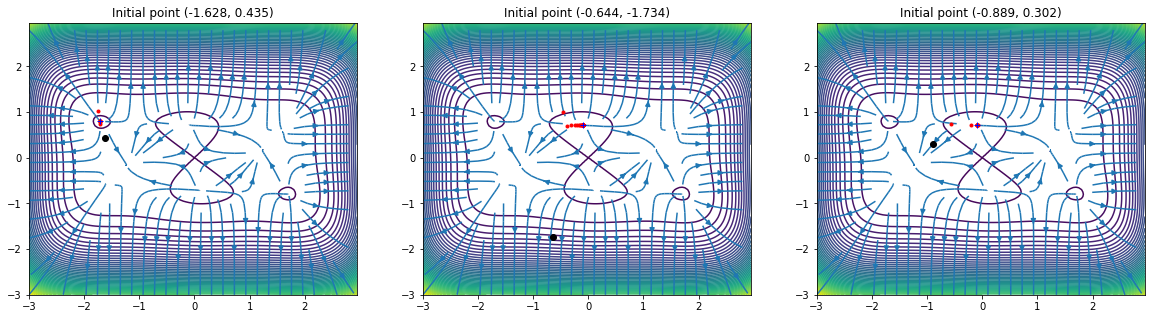

In [32]:
creation(function_x, grad_desc_criterion, 5, 1000)

The backtracking algorithm proves to be more efficient at finding the minimum with just around 10 iterations needed. This is because the $\alpha$ value can be higher at the beginning and so the steps are higher and make the x be closer to the minimum faster. Moreover, since the steps are higher, the probability to get stuck in a minimum is reduced. And apart from this the stop criterion makes the algorithm stop when it reaches the minimum. 

#### 1.3. The Rosenbrock function

$f(x_1,x_2)= (a-x_1)^2 + b(x_2-x_1^2)^2$\
where  $\nabla f(x)=(-2(a-x_1)-4x_1b(x_2-x_1^2), 2b(x_2-x_1^2)$ with a=1 and b=100.

In [14]:
def rosenbrock(x):
    X=x[0]
    Y=x[1]
    a=1
    b=100
    func = (a-X)**2 + b*((Y-X**2)**2)
    
    gradx = -2+2*X-400*X*Y+400*X**3
    grady = 200*Y-200*X**2
    grad = [gradx, grady]
    
    hess11 = 2+1200*X**2-400*Y
    hess12 = -400*X
    hess21 = -400*X
    hess22 = 200
    hess = [[hess11,hess12],[hess21,hess22]]
    
    return[func, grad, hess]

The last exercise is repeated for this different case:

number of points : 9550
solution : 0.989, 0.978
number of points : 4365
solution : 0.992, 0.984
number of points : 4830
solution : 1.011, 1.023


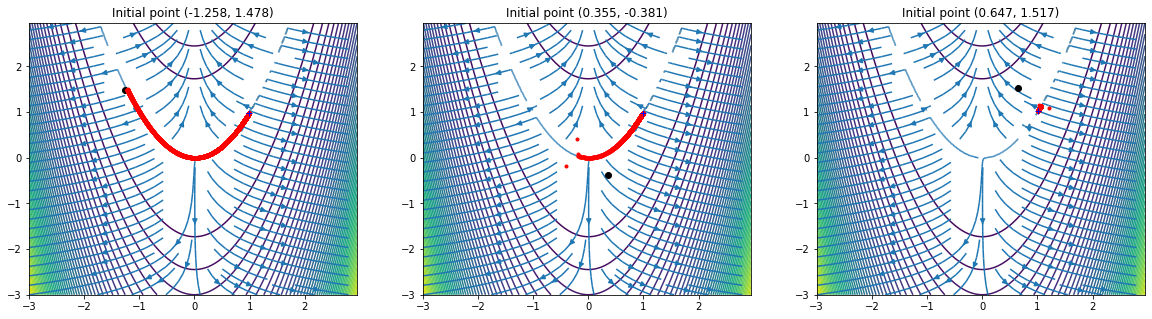

In [15]:
creation(rosenbrock,grad_desc_criterion, 1, 10000)

Even though this function has just 1 minimum (1, 1) it is very difficult to reach it due to its shape. As expected the minimum for Rosenbrock function is not found efficiently, with 9-10 thousand iterations needed. 

### 2. Newton descent method

For the Newton Descent algorith we will use the following expression: $$x^{k+1} = xk + \alpha^k d^k$$

Where $d^k$ is the so called Newton direction of the descent is obtained solving:
$$\nabla^2 f(x^k) d^k = -\nabla f(x^k)$$

The convergence criterion for this method will be the same as the one used in Gradient descent.
#### 2.1. A simple quadratic function

$f(x) = 100x_1^2+x_2^2$ where $\nabla f(x)=(200x_1, 2x_2)$ 

First, we are going to solve the problem using the Gradient descent method as we've been doing until this point:

In [16]:
def convex2(x):
    func = 200*x[0]**2+x[1]**2
    grad = [200*x[0], 2*x[1]]
    hess = np.array([[200,0],[0,2]])
    return[func, grad, hess]

number of points : 328
solution : 0.000, -0.002
number of points : 389
solution : 0.000, 0.002
number of points : 373
solution : -0.000, -0.002


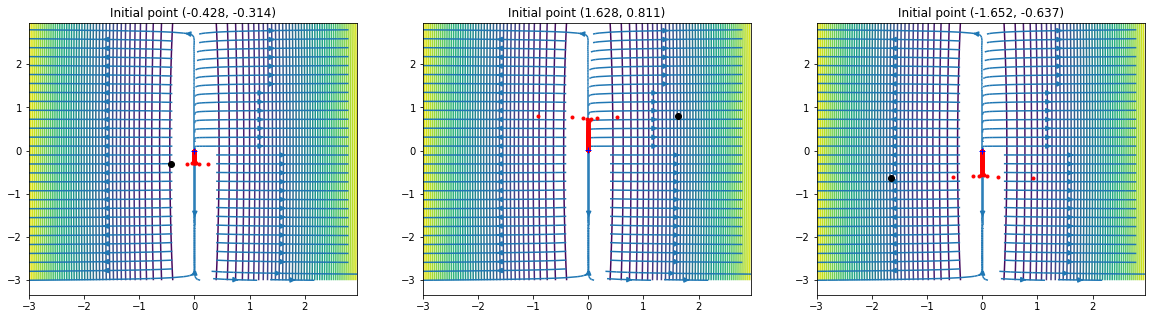

In [17]:
creation(convex2,grad_desc_criterion, 1, 10000)

In this case we can see that after several iterations the Gradient descent method reaches the minimum. Let's see how the Netwon descent method works for this case:

In [18]:
def newton(x0, fig, alpha, iters, function):

    fig.set_title("Initial point (%.3f, %.3f)" % (x0[0], x0[1]))
    fig.plot(*x0, 'ko')
    
    for i in range(iters):
        
        grad = np.array(function(x0)[1])
        hessMatrix = np.array(function(x0)[2])
        
        
        #check if Hessian Matrix is definite positive
        positive = np.all(np.linalg.eigvals(hessMatrix) > 0)
        
        if positive:
            x = x0 - alpha * np.linalg.solve(hessMatrix,grad)
        else:
            x = x0 - alpha * grad
        
        #backtracking for alpha
        f0 = function(x0)[0]
        f = function(x)[0]
        while (f>f0): 
            alpha = alpha/2
            if positive:
                x = x0 - alpha * np.linalg.solve(hessMatrix,grad)
            else:
                x = x0 - alpha * grad
            f = function(x)[0]
        
        #stop criterion 
                          
        if positive:
            fig.plot(*x0, 'g.') 
        else:
            fig.plot(*x0, 'r.') 
           
        if(np.abs(f-f0) < 10e-8) | (np.linalg.norm(grad) < 10e-5):
            break
        f0=f
        x0=x
            
    print("number of iterations : %i"%i)
    print("solution : %.3f, %.3f"%(x0[0],x0[1]))
    fig.plot(*x0, 'b+')
    
    return fig

number of iterations : 1
solution : 0.000, 0.000
number of iterations : 1
solution : -0.000, 0.000
number of iterations : 1
solution : 0.000, 0.000


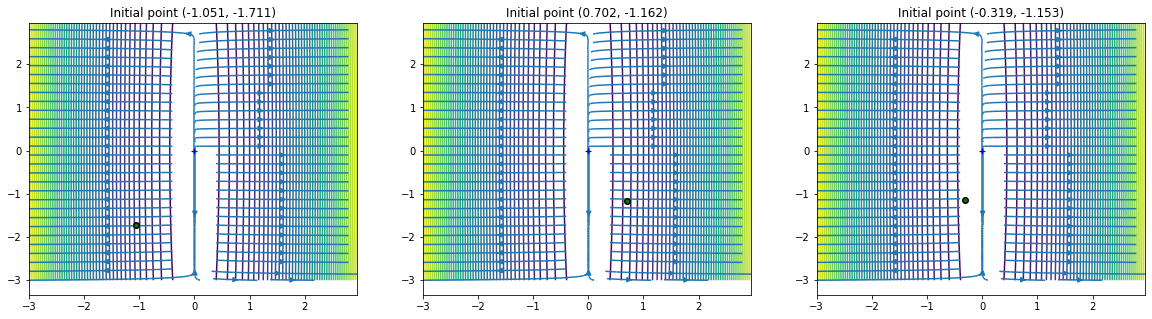

In [19]:
creation(convex2,newton, 1, 10000)

The Newtons Descent Method is much faster and efficient, it can reach the minimum with just one or a few iterations. This is mainly because the step magnitude is much higher in this case, the only limitation is that it is more computationally expensive if you have to deal with large number of variables and can only be computed if the point where the function is evaluated has a positive definite Hessian. In this case works really good. 

#### 2.2. A more complicated function
##### 1) Gradient descent algorithm
already did that : 1.2.2

##### 2) Newton - Gradient descent algorithm

number of iterations : 99
solution : 0.089, -0.713
number of iterations : 99
solution : -0.091, 0.713
number of iterations : 6
solution : -1.607, -0.569


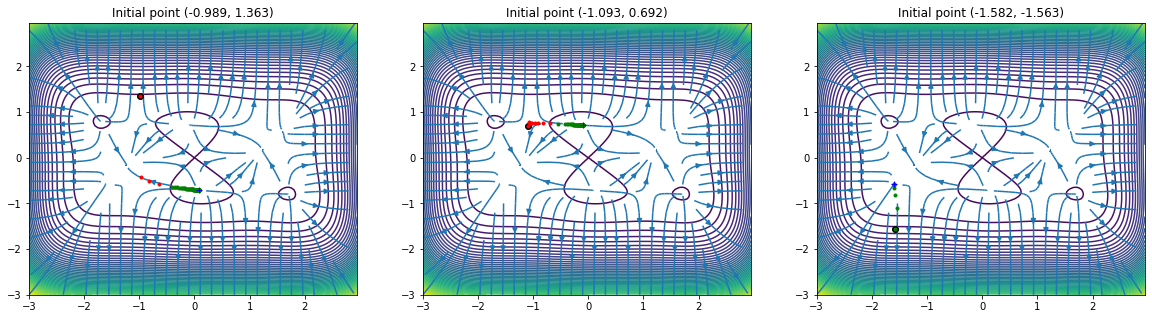

In [35]:
creation(function_x, newton, 1, 100)

#### 2.3. Rosenbrock function


number of iterations : 36
solution : 1.000, 1.001
number of iterations : 34
solution : 1.000, 1.001
number of iterations : 122
solution : 0.999, 0.999


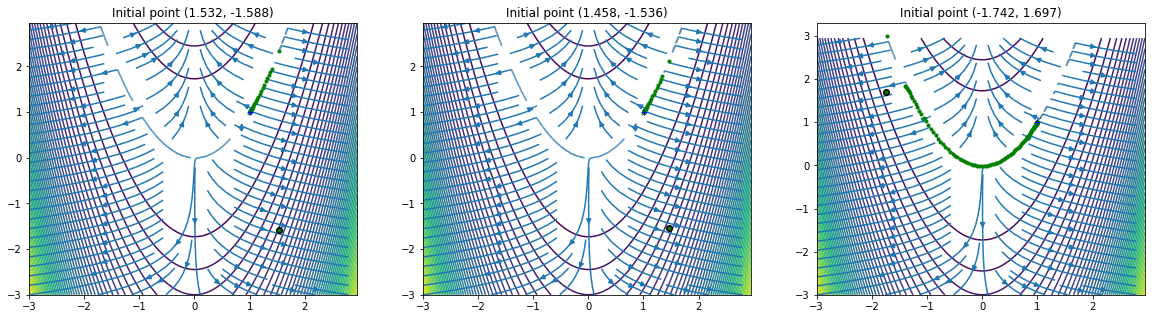

In [21]:
creation(rosenbrock, newton, 1, 1000)